# Establishig a class-specific probability filter #

Using the vaidation data and unknown data from the kraft et al (2022) dataset mixed in 50:50. we 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import numpy as np
import seaborn as sns

# Load Classified Data #
Data is split between two files: 
- `test-xception-57-class-non-merge.csv` - contains all of the probabilities for each class for each images
- `test-xception-57-fnames-non-merge-altered.csv` - image filenames and the manually annoated class

To get at accuracy, these dataframes need to be merged

In [2]:
df = pd.read_csv("../output/20230216-soft-none_class.csv", index_col=0)
cols = df.columns
fnames = pd.read_csv("../output/20230216-soft-none_fnames.csv")
df['fname'] = fnames['fname']
df['base'] = fnames['base']
df['class_name'] = fnames['class']

In [3]:
df_unclass = pd.read_csv("../output/nonclassified_output_soft_none.csv")
df_unclass['class_name'] = "Unclassified"

Helper functions to combine the dataframes

In [4]:
def get_top_prob(row):
    return row[cols].max()

def get_top_class(row):
    ix = row[cols].values.argmax()
    return cols[ix]

In [5]:
df['top_prob'] = df.apply(get_top_prob,axis=1)
df['top_class'] = df.apply(get_top_class,axis=1)
df.head()

Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  Asterionellopsis  \
0  0.007929             0.000990     9.107120e-09      4.084455e-12   
1  0.010181             0.000396     3.152999e-11      2.543864e-14   
2  0.050487             0.044556     3.284021e-07      3.885024e-14   
3  0.026800             0.026244     1.045363e-08      2.564211e-13   
4  0.308486             0.007158     1.085467e-10      1.542535e-12   

    Boreadinium   Centric      Ceratium   Chaetoceros  Ciliates  \
0  1.131404e-07  0.000021  5.972353e-10  5.572043e-09  0.000002   
1  2.677608e-05  0.003890  3.722711e-10  5.175114e-09  0.000032   
2  4.897224e-05  0.005637  2.161419e-09  8.413080e-08  0.001784   
3  6.435865e-06  0.002715  5.346661e-09  1.677228e-08  0.008935   
4  2.352852e-06  0.015058  6.338682e-09  1.537219e-08  0.000761   

   Clusterflagellate  ...     Tintinnid      Tontonia    Torodinium  \
0       7.354164e-07  ...  9.366558e-10  2.341341e-11  1.246854e-07   
1       5.658488e-07  ...  9.224929e-10  3.383587e-09  2.772989e-07   
2       1.901874e-08  ...  1.986858e-11  2.269120e-10  1.557166e-06   
3       4.566704e-09  ...  1.014469e-09  5.518087e-09  1.275717e-06   
4       5.491783e-10  ...  5.317580e-11  3.747901e-10  3.930901e-07   

    Tropidoneis  Vicicitus                                              fname  \
0  9.370702e-10   0.990730  /home/pcdaniel/Documents/IFCB/image-extraction...   
1  1.803955e-11   0.982576  /home/pcdaniel/Documents/IFCB/image-extraction...   
2  3.000962e-11   0.876239  /home/pcdaniel/Documents/IFCB/image-extraction...   
3  1.566988e-11   0.881114  /home/pcdaniel/Documents/IFCB/image-extraction...   
4  3.923000e-12   0.663807  /home/pcdaniel/Documents/IFCB/image-extraction...   

                                 base  class_name  top_prob  top_class  
0  D20180714T050213_IFCB104_01096.png   Vicicitus  0.990730  Vicicitus  
1  D20180714T061222_IFCB104_02288.png   Vicicitus  0.982576  Vicicitus  
2  D20180714T072230_IFCB104_01085.png   Vicicitus  0.876239  Vicicitus  
3  D20180717T143205_IFCB104_00330.png   Vicicitus  0.881114  Vicicitus  
4  D20180717T160534_IFCB104_01565.png   Vicicitus  0.663807  Vicicitus  

[5 rows x 56 columns]

In [6]:
df_unclass['top_prob'] = df.apply(get_top_prob,axis=1)
df_unclass['top_class'] = df.apply(get_top_class,axis=1)

In [7]:
df_unclass.head()

Unnamed: 0      Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  \
0           0  2.892377e-09         9.786784e-09     9.189492e-15   
1           1  3.360879e-08         4.880987e-10     1.560888e-13   
2           2  5.291467e-10         4.571089e-08     9.750785e-13   
3           3  5.160323e-07         1.723238e-07     9.073463e-13   
4           4  2.446844e-08         1.551499e-07     5.497937e-12   

   Asterionellopsis   Boreadinium   Centric      Ceratium   Chaetoceros  \
0      5.542851e-10  7.197427e-11  0.000001  2.824648e-09  2.440644e-05   
1      2.586651e-11  1.653415e-11  0.000001  2.983576e-09  6.503622e-07   
2      1.429825e-07  2.853048e-09  0.000814  6.042530e-09  4.119198e-05   
3      2.889255e-08  2.353647e-09  0.000015  5.420021e-08  1.497362e-06   
4      1.625365e-07  2.217018e-10  0.000090  5.102161e-08  1.301850e-05   

       Ciliates  ...       Tiarina     Tintinnid      Tontonia    Torodinium  \
0  2.732560e-07  ...  7.121469e-13  1.197063e-12  6.687587e-10  1.064746e-07   
1  6.461786e-09  ...  1.051721e-13  1.284662e-13  1.217879e-10  8.060511e-09   
2  7.416260e-07  ...  2.750430e-13  2.162301e-11  1.428371e-10  6.193777e-07   
3  2.233213e-09  ...  8.587895e-13  1.837253e-10  7.763702e-12  2.112162e-06   
4  5.328372e-06  ...  2.991087e-12  4.083157e-12  8.661380e-10  3.748056e-06   

    Tropidoneis     Vicicitus                     fname    class_name  \
0  8.684984e-15  4.802499e-12   Amylax_triacantha_1.png  Unclassified   
1  2.183879e-14  1.794658e-12  Amylax_triacantha_10.png  Unclassified   
2  4.495405e-13  2.736358e-10  Amylax_triacantha_11.png  Unclassified   
3  1.373396e-13  8.607796e-11  Amylax_triacantha_12.png  Unclassified   
4  1.158369e-13  7.936833e-09  Amylax_triacantha_13.png  Unclassified   

   top_prob  top_class  
0  0.990730  Vicicitus  
1  0.982576  Vicicitus  
2  0.876239  Vicicitus  
3  0.881114  Vicicitus  
4  0.663807  Vicicitus  

[5 rows x 56 columns]

__Ramp threshold from (.01 to .99) and recalculate accuracy at each step__

In [8]:
class_val = df['class_name'].values
class_top = df['top_class'].values
class_prob = df['top_prob'].values
thresh = np.arange(.0,1,0.01)
class_acc_all = np.zeros(len(thresh))
class_f = np.zeros(len(thresh))

In [9]:
for i, t in enumerate(thresh):
    new_class = np.copy(class_top)
    ixs = np.where(class_prob < t)
    new_class[ixs] = 'Unknown'
    class_acc_all[i] = sklearn.metrics.accuracy_score(class_val, new_class,normalize=True)
    class_f[i] = sklearn.metrics.f1_score(class_val, new_class, average="weighted")

__Plot Results__

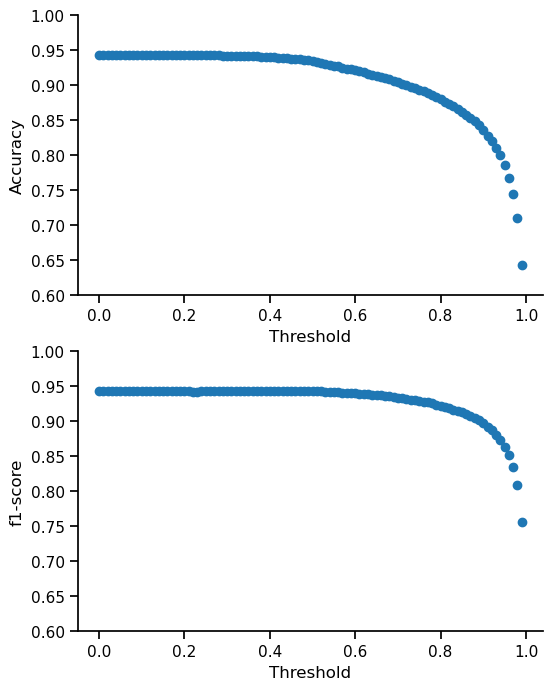

In [11]:
sns.set_context("notebook")

fig, (ax, ax2) = plt.subplots(2)
fig.set_size_inches(6,8)

ax.scatter(thresh, class_acc_all)
ax.set_xlabel("Threshold")
ax.set_ylabel("Accuracy")
ax.set_ylim(.6,1)

ax2.scatter(thresh, class_f)
ax2.set_xlabel("Threshold")
ax2.set_ylabel("f1-score")
ax2.set_ylim(.6,1)
sns.despine()
# plt.savefig("../notebooks/figures/threshold_sensitivity_all.png", dpi=300, bbox_inches='tight')

## Calculate accuracy for each class ##

Store data in `class_acc` which should (57 x 100)

In [15]:

thresh = np.arange(.0,1,0.01)
class_fscore = np.zeros((cols.shape[0],len(thresh))) # 54 x 100
class_recall = np.zeros((cols.shape[0],len(thresh))) # 54 x 100
class_acc = np.zeros((cols.shape[0],len(thresh))) # 54 x 100

for j, c in enumerate(cols):

    class_df = df.query("class_name == @c")

    if len(class_df) > len(df_unclass):
        class_df = class_df.sample(n=len(df_unclass))

    class_val = class_df['class_name'].values
    class_top = class_df['top_class'].values
    class_prob = class_df['top_prob'].values

    random_unclass = df_unclass.sample(n=len(class_df))
    rand_val = random_unclass['class_name'].values
    rand_top = random_unclass['top_class'].values
    rand_prob = random_unclass['top_prob'].values

    all_val = np.concatenate((class_val, rand_val))
    all_top = np.concatenate((class_top, rand_top))
    all_prob = np.concatenate((class_prob, rand_prob))


    for i, t in enumerate(thresh):
        new_class = np.copy(all_top)
        ixs = np.where(all_prob < t)
        new_class[ixs] = 'Unclassified'
        class_fscore[j,i] = sklearn.metrics.f1_score(all_val, new_class, average="weighted")
        class_acc[j,i] = sklearn.metrics.accuracy_score(all_val, new_class, normalize=True)
        class_recall[j,i] = sklearn.metrics.recall_score(all_val, new_class, average="weighted")

/home/pcdaniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pcdaniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pcdaniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pcdaniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

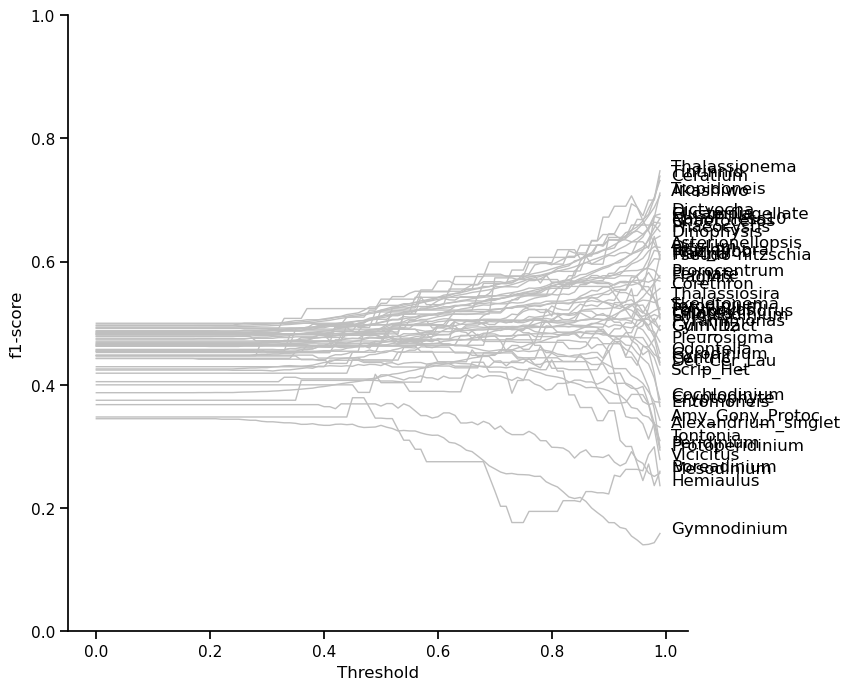

In [19]:
sns.set_context("notebook")

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in range(cols.shape[0]):
    ax.plot(thresh, class_fscore[k,:],color='.75',marker='None',lw=1)
    ax.text(x=1.01, y=class_fscore[k,-1], s=cols[k])


# ax.plot(thresh, class_acc_all, marker='None',lw=3)
ax.set_xlabel("Threshold")
ax.set_ylabel("f1-score")
ax.set_ylim(0,1)

sns.despine()
# plt.savefig("../notebooks/figures/threshold_sensitivity_byclass.png", dpi=300, bbox_inches='tight')

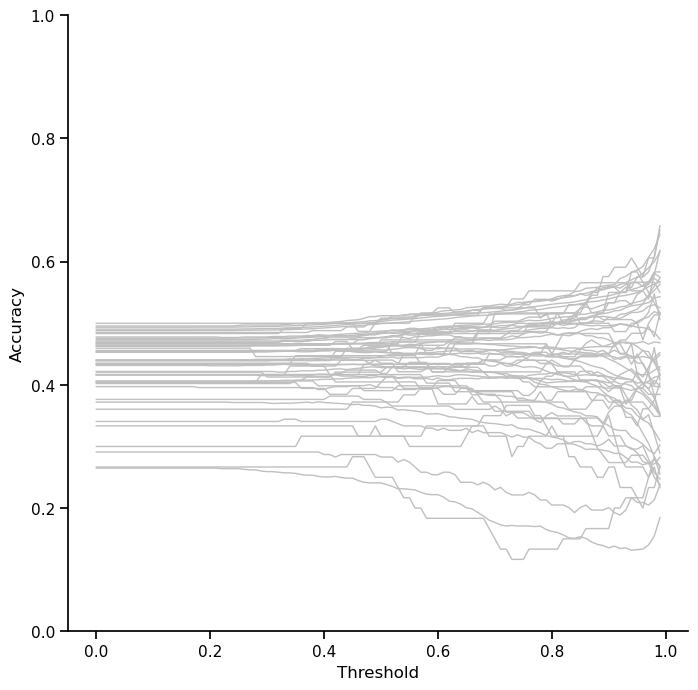

In [17]:
sns.set_context("notebook")

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in range(cols.shape[0]):
    ax.plot(thresh, class_acc[k,:],color='.75',marker='None',lw=1)

# ax.plot(thresh, class_acc_all, marker='None',lw=3)
ax.set_xlabel("Threshold")
ax.set_ylabel("Accuracy")
ax.set_ylim(0,1)

sns.despine()
# plt.savefig("../notebooks/figures/threshold_sensitivity_byclass.png", dpi=300, bbox_inches='tight')

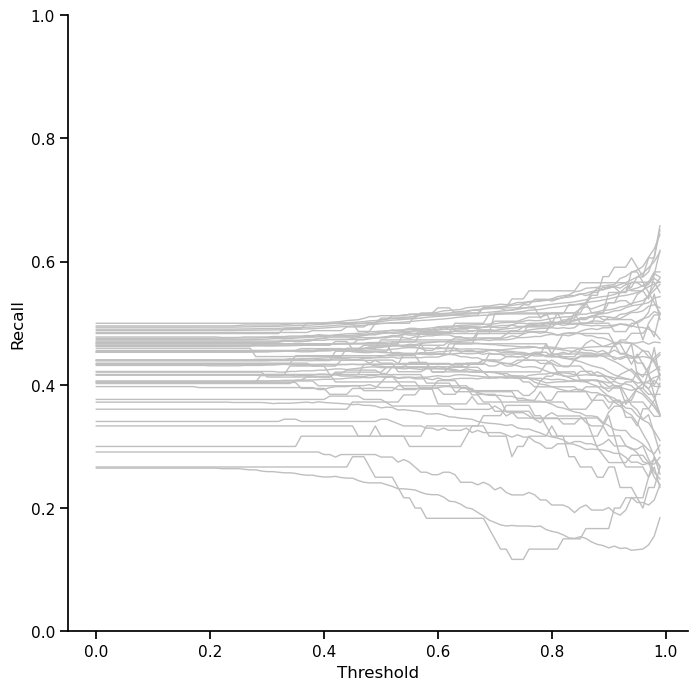

In [18]:
sns.set_context("notebook")

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in range(cols.shape[0]):
    ax.plot(thresh, class_recall[k,:],color='.75',marker='None',lw=1)

# ax.plot(thresh, class_acc_all, marker='None',lw=3)
ax.set_xlabel("Threshold")
ax.set_ylabel("Recall")
ax.set_ylim(0,1)

sns.despine()
# plt.savefig("../notebooks/figures/threshold_sensitivity_byclass.png", dpi=300, bbox_inches='tight')